#Read police_killings.csv into a Pandas Dataframe called police_killings.
#You'll need to specify the encoding keyword argument as ISO-8859-1 when using the read_csv() Pandas function.
#Print out and look at the columns in the data.
#Print out the first few rows of the data and spend some time looking over everything.
#After doing this, you should have an idea of the structure of the data, and how you might go about working with it.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
police = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")
police.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


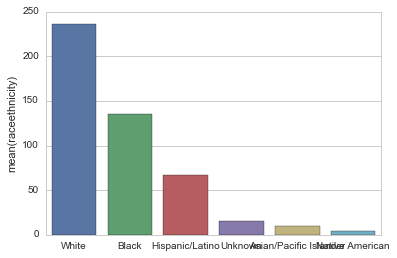

In [28]:
race_ethnicity = police["raceethnicity"].value_counts()
race_ethnicity

sns.set_style("whitegrid")
ax = sns.barplot(x=race_ethnicity.index, y=race_ethnicity)

#Shootings by race
#You can use the value_counts() method on a Series to count up how many times each unique value occurs in a column. 
#If you run value_counts() on the raceethnicity column, you can discover how many people of each race were killed.

#Instructions
#Use the value_counts() method on the raceethnicity column.
#Make a bar graph of the results.
#Make sure to initialize matplotlib in the notebook with %matplotlib inline first! Also make sure you import matplotlib.
#You can use the xticks() function to set x axis labels.
#Write about how the pattern looks in a Markdown cell. Does anything here surprise you? 
#How might you go about digging deeper and seeing if there's a consistent pattern?
#In particular, you might want to look up the percentage of each race in the US population as a whole. 
#How do those percentages match up to the chart you just made?

In [21]:
police_test.loc["Adrian Hernandez"]

name                                 Adrian Hernandez
age                                                22
gender                                           Male
raceethnicity                         Hispanic/Latino
month                                           March
day                                                27
year                                             2015
streetaddress                          4000 Union Ave
city                                      Bakersfield
state                                              CA
latitude                                      35.3957
longitude                                    -119.003
state_fp                                            6
county_fp                                          29
tract_ce                                          700
geo_id                                     6029000700
county_id                                        6029
namelsad                               Census Tract 7
lawenforcementagency    Bake

The p_income column is median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

You can explore this relationship by making a histogram of the column. You'll need to do some data cleaning in order to construct the histogram, though, as not all the values in the p_income column are numeric. When an income couldn't be found for the census area, the value is a -. Because of this, the column has a string type instead of an integer type.

To fix this, and be able to construct a histogram, you'll need to remove all the - values from the column, then convert the column to an integer type.


Instructions
Create a new Pandas Series called income that contains all the values from the p_income column, except the dashes (-).
Convert income to an integer type using the astype() method.
Use the hist() method on income to generate a histogram.
You can experiment with the bins keyword argument to change the number of bins in the histogram. More will give you a more granular look.
Review the histogram. How does this compare to the median US personal income? You might want to look up some data. Write up your findings, and what you think this histogram indicates.
There are a few different definitions of personal income. Which one did the FiveThirtyEight team use when they constructed the dataset? You can read more here. Comparing to a differently calculated personal income number can lead to faulty conclusions!

Since you have geographic data, you can look at breakdowns of shootings by region. You don't have a ton of data, so going for the largest possible regions (states) makes sense. If you looked at counties, you likely would get mostly 0 or 1 shootings per county, which wouldn't let you establish any patterns.

There is one caveat to be aware of when looking at population-level data. Finding that more people were shot in Texas than Georgia doesn't automatically mean that cops are more likely to shoot people in Texas. This is because Texas has a higher population than Georgia. To truly figure out which states tend to have police more likely to shoot people, you need to look at a population adjusted rate. You can compute this by dividing the number of people shot in each state by the state population.

To accomplish this, we'll need to leverage external data. We can find state-level data on population here. Here are the relevant columns in the dataset:

POPESTIMATE2015 -- the estimated 2015 population of the state.
NAME -- the name of the state, as a string (such as Texas).
STATE -- the numeric Census code of the state.
There's a problem here, though. In the police_killings Dataframe, the state column gives you a state name abbreviation, like CA. You can't use this to match the population with the right state in police_killings, because the population dataset only has complete state names. Instead, we'll use the state_fp column in police_killings to match. state_fp contains Census codes, which correspond to the STATE column in the population dataset.

We can use the merge() method on Dataframes to merge a Dataframe with another Dataframe that shares a common column.


Instructions
Read in state_population.csv as a Dataframe and assign to the state_pop variable.
Use the value_counts() method on the state_fp column of police_killings. Assign the result to counts.
This will result in a Pandas Series, where the index is the code for each state, and the values are the numbers of police killings in each state.
You'll want to eventually merge state_pop and counts. You can use the merge() method on Dataframes for this. We'll need to do some preliminaries before we can use it, though.
You'll first need to make a new Dataframe to hold the data from counts. The index will also need to be its own column.
Create a new Dataframe called states. One column should be called STATE, and will contain the index of counts. The other column should be called shootings, and will contains the values from counts. You can do this with this code: states = pd.DataFrame({"STATE": counts.index, "shootings": counts}).

Use the merge() method to merge state_pop and states.
Pass the on keyword argument, with the value set to STATE. STATE is the common column that both states and state_pop share.
After merging, assign the result back to states.
Create a new column in states called pop_millions. Assign the result of dividing the POPESTIMATE2015 column by 1000000 to this column. This will give you the population in terms of millions.
Create a new column in states called rate. Assign the result of dividing the shootings column by pop_millions to the rate column. This will give you the rate of police killings per one million people in each state.
Print out the dataset, and look at the rates by state.
It may be useful to try the sort() method on Dataframes to sort states in ascending and descending order to see the states with the most and least police killings per million people.
Write up your findings. Which states have the most and least police killings per million people? Why do you think this is?

Why do some states have a much higher rate of police killings than others? Is it due to random chance, or is there an underlying factor that could explain it? It will be good to dive more into the data to find any significant differences.

You'll first need to split police_killings into two parts. One part will have the 10 states with the lowest shooting rate, and the other will have the 10 states with the highest shooting rate. You can use the isin() method to perform this split. You can first make a list of 10 abbreviations corresponding to the lowest shooting rate states. Then, use isin() to only select rows from police_killings where the state column is in the list.

You'll then be able to look at a few columns that could reveal interesting differences:

pop -- population of the census area where the incident occurred.
county_income -- median household income in the county.
share_white -- the percentage (out of 100) of whites in the census area.
share_black -- the percentage (out of 100) of blacks in the census area.
share_hispanic -- the percentage (out of 100) of hispanics in the census area.
You can use the describe() method on Dataframes to compute summary statistics for each column in each Dataframe. This will reveal differences between the states with high and low shooting rates.


Instructions
Create a new Dataframe called pk where all rows with - values for share_white, share_black, or share_hispanic are removed.
Convert share_white, share_black, and share_hispanic in pk to the float type using the astype() method.
Create a Dataframe containing only rows from pk that took place in one of the 10 states with the lowest shooting rates.
Create a Dataframe containing only rows from pk that took place in one of the 10 states with the highest shooting rates.
Compare the mean value of each column mentioned above across both Dataframes. You can use the mean() method for this.
Do you see any interesting patterns? Write up your results.
Were there any problems with this analysis?
We removed all rows with a - in them for the share columns. What was removed? Did this bias the results?
We're actually looking at columns that contain county-level data for where the shooting occurred. So we're not actually doing a state by state comparison of the columns. This may bias the data, and change what we found. Would the analysis be stronger if we got state-level data for instead of averaging the county-level data in the columns? Why or why not?